In [1]:
import os
import torch

In [2]:
import re #thư viện dùng xử lý chuỗi
import unicodedata #thư viện dùng decode câu thành unicode8
import spacy #thư viện giúp xử lý, trích xuất thông tin từ văn bản 
from tqdm import tqdm #thư viện dùng để tạo thanh triến trình (cho train model)
import pandas as pd #thư viện dùng để tạo ma trận dữ liệu
import numpy as np #thư viện dùng để xử lý mảng nhiều chiều
import random #thư viện tạo số ngẫu nhiên
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #vẽ biểu đồ wordcloud
import matplotlib.pyplot as plt #vẽ biểu đồ phân tích data
import seaborn as sns #vẽ biểu đồ phân tích data

In [14]:
with open( r"C:\Users\Admin\Downloads\NLP\dataset\lang8.train.auto.bea19.m2") as f:
  data = f.readlines() #đọc file dữ liệu

In [15]:
print(len(data)) #số lượng dòng dữ liệu trong file

4015882


In [16]:
m2 = open(r"C:\Users\Admin\Downloads\NLP\dataset\lang8.train.auto.bea19.m2").read().strip().split("\n\n") #đọc file m2 chứa câu gốc và ttin ngữ pháp
out = open('corrected.txt', "w") #từ file m2 => đọc file đã được sửa lỗi
in_ = open('error.txt', "w") #từ file error => đọc file sai lúc đầu

skip = {"noop", "UNK", "Um"} #các từ không cần sửa lỗi

for sent in tqdm(m2): #tạo thanh triển trình cho mỗi câu
  sent = sent.split("\n") #chia thành từng dòng (1 dòng có câu gốc và câu đã chỉnh sửa)
  cor_sent = sent[0].split()[1:] #lấy câu gốc (sent[0] là câu gốc) và bỏ đi từ đầu tiên là chữ A

  in_.write(" ".join(sent[0].split()[1:])+"\n" ) #ghi câu gốc vào file error.txt
  #print('ORIGINAL',sent[0].split()[1:])

  edits = sent[1:] #lấy câu đã chỉnh sửa
  offset = 0 #vị trí cho các từ bị thay đổi
  for edit in edits: #xét qua từng chỉnh sửa do mỗi lỗi có format như sau: A 3 4|||SPELL|||example|||REQUIRED|||-NONE-|||0
    edit = edit.split("|||") #câu lỗi có format như sau: A 3 4|||SPELL|||example|||REQUIRED|||-NONE-|||0 )
  #tuân theo M2 format: A (annotation): dòng sửa lỗi. 3 4: vị trí lỗi từ 3 đến 4. SPELL: loại lỗi. example: từ đã sửa. REQUIRED: bắt buộc sửa. -NONE-: không có gì. 0: id người sửa lỗi
    if edit[1] in skip: #nếu lỗi nằm trong mục "noop","UNK","Um" thì bỏ qua
      continue
    coder = int(edit[-1]) #lấy id người sửa lỗi (0 là người sửa lỗi)
    if coder != 0: #nếu id người sửa lỗi khác 0 thì bỏ qua
      continue
    span = edit[0].split()[1:] #lấy vị trí cần chỉnh sửa
    start = int(span[0]) #vị trí bắt đầu
    end = int(span[1]) #vị trí kết thúc
    cor = edit[2].split() #cụm từ đã sửa
    cor_sent[start+offset:end+offset] = cor #thay thế cụm từ đã sửa vào câu gốc
    offset = offset-(end-start)+len(cor) #điều chỉnh offset để cập nhật vị trí

  #print('CORRECT',cor_sent)
  out.write(" ".join(cor_sent)+"\n") #lưu câu đã sua vào file corrected.txt

100%|██████████| 1037561/1037561 [00:04<00:00, 232044.08it/s]


In [17]:
with open('corrected.txt') as f:
  correct_data = f.read() #đọc file corrected.txt

with open('error.txt') as f:
  error_data = f.read() #đọc file error.txt

In [18]:
import pandas as pd #thư viện dùng để tạo ma trận dữ liệu

correct_list = correct_data.split('\n') #tách dữ liệu file corrected.txt thành từng dòng
error_list = error_data.split('\n') #tách dữ liệu file error.txt thành từng dòng

min_length = min(len(correct_list), len(error_list)) #lấy độ dài nhỏ nhất giữa 2 file
correct_list = correct_list[:min_length] #lấy phần thuộc độ dài nhỏ nhất của file corrected.txt
error_list = error_list[:min_length] #lấy phần thuộc độ dài nhỏ nhất của file error.txt

final_data = pd.DataFrame({ #tạo dataframe từ 2 file corrected.txt và error.txt. Gồm 2 cột. Cột 1 (correct) là câu ban đầu, cột 2 (error) là câu đã sửa
    'correct': correct_list,
    'error': error_list
})

In [19]:
final_data.describe() #tính số dòng dữ liệu (count), số dòng độc nhất (unique), số từ xuất hiện nhiều nhất (top), số lần xuất hiện của từ nhiều nhất (freq)


,correct,error
count,1037447,1037447
unique,937858,943857
top,URL,URL
freq,2761,2764


In [20]:
pd.options.display.max_colwidth = 600 #đặt giới hạn chiều rộng của cột để display dataframe
final_data[100:150] #in ra 50 dòng đầu tiên

,correct,error
100,"Well , I just have to get it and check it out .","Well , there remains to get it and check it out ."
101,My mum is a great cook !,My mum is a great cook !
102,"Hi everyone ,","Hi everyone ,"
103,I just realised I am so lucky ! ! !,I just realised I am so lucky ! ! !
104,Why ?,Why ?
105,It 's because my mum is probably the best cook I have ever met in my life .,It 's because my mum is probably the best cook I have met in my life .
106,"Cooking is not her profession ; but rather , she is a housewife .","Cooking is not her profession , she is a housewife ."
107,I have eaten at hotels and have had expensive meals but they are nothing like what she cooks .,I have ate at hotels and expensive meals but they are nothing like what she cooks .
108,A friend once told me that the reason why I love her cooking is because she 's my mum but that is not the reason .,A friend once told me that the reason why I love her cooking is because she 's my mum but that is not the reason .
109,Being a housewife is really tough .,Being a housewife is really tough .


In [21]:
final_data.to_csv( r"C:\Users\Admin\Downloads\NLP\dataset\raw_data.csv", index = False) #lưu dataframe vào file csv

In [22]:
final_data = pd.read_csv(r"C:\Users\Admin\Downloads\NLP\dataset\raw_data.csv") #đọc file csv

In [23]:
final_data.describe() #tương tự như trên

,correct,error
count,1037425,1037424
unique,937856,943854
top,URL,URL
freq,2761,2764


In [24]:
final_data = final_data.drop_duplicates() #loại bỏ các dòng trùng lặp

In [25]:
final_data.describe() #các dòng giống hệt nhau đã được loại bỏ

,correct,error
count,950641,950640
unique,937856,943854
top,Thank you for reading .,Nice to meet you .
freq,31,11


In [26]:
final_data = final_data.dropna() #loại bỏ các dòng có giá trị null

In [27]:
final_data.describe() #dòng nào có giá trị null đã bị loại bỏ

,correct,error
count,950640,950640
unique,937855,943854
top,Thank you for reading .,Nice to meet you .
freq,31,11


In [28]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ] #list lưu độ dài của từng câu trong cột correct
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ] #list lưu độ dài của từng câu trong cột error

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

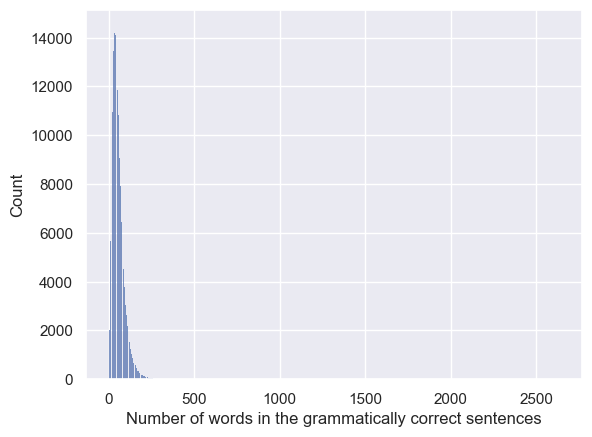

In [29]:
sns.set_theme()
ax = sns.histplot(data=len_1) #histogram cho độ dài của câu trong cột error
ax.set_xlabel('Number of words in the grammatically correct sentences') #đặt tên cho trục x

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

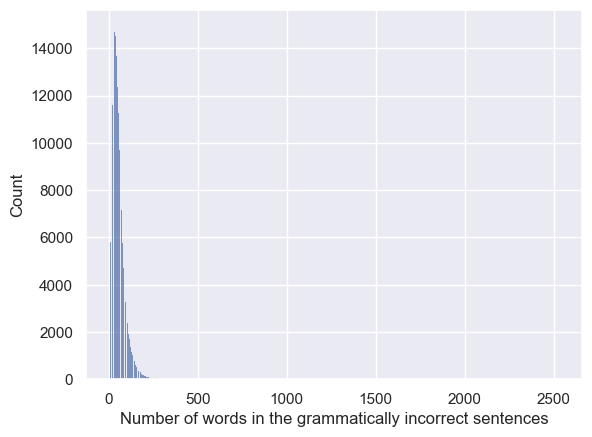

In [30]:
sns.set_theme()
ax = sns.histplot(data=len_2) #histogram cho độ dài của câu trong cột error
ax.set_xlabel('Number of words in the grammatically incorrect sentences') #đặt tên cho trục x

In [31]:
combined_text = ' '.join(final_data['error']) + ' ' + ' '.join(final_data['correct']) #kết hợp cả tất cả câu error và correct lại để thành 1 chuỗi, cách nhau bởi 2 spaces

stopwords = set(STOPWORDS) #chỉnh stopword

filtered_text = ' '.join([word for word in combined_text.split() if word.lower() not in stopwords]) #chuyển các từ thành lowercase nếu như nó không nằm trong list các từ stopword

wordcloud_no_stopwords = WordCloud(width = 800, height = 800, #chiều dài 800, chiều rộng 800 pixel
                                   background_color ='white', #màu nền trắng
                                   min_font_size = 10).generate(filtered_text) #tạo đám mấy từ từ filtered_text 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_no_stopwords) #show đám mây từ
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

KeyboardInterrupt: 

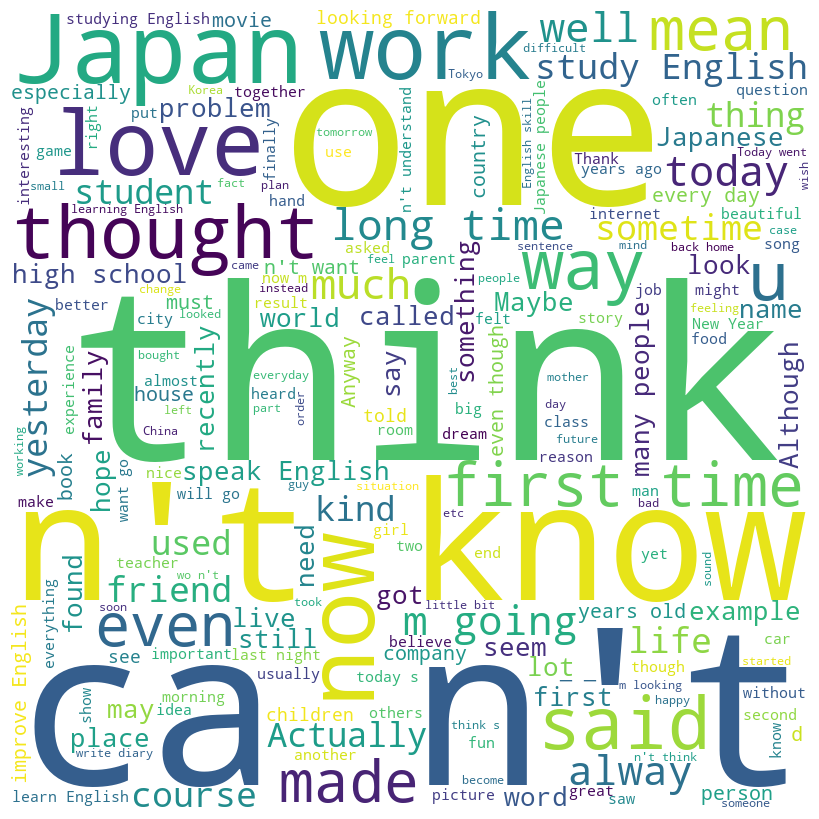

In [ ]:
correct_text = " ".join(final_data['correct']) #kết hợp tất cả các câu correct lại thành 1 chuỗi, cách nhau bởi 1 spaces

stopwords = set(STOPWORDS)

filtered_text = ' '.join([word for word in correct_text.split() if word.lower() not in stopwords]) #chuyển sang lowercase nếu không nằm trong stopword

wordcloud_no_stopwords = WordCloud(width = 800, height = 800, #đặt kích thước cho đám mây từ
                                   background_color ='white', #màu background là trắng
                                   min_font_size = 10).generate(filtered_text) #đám mấy từ cho các câu correct

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_no_stopwords) #show ra đám mây từ
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

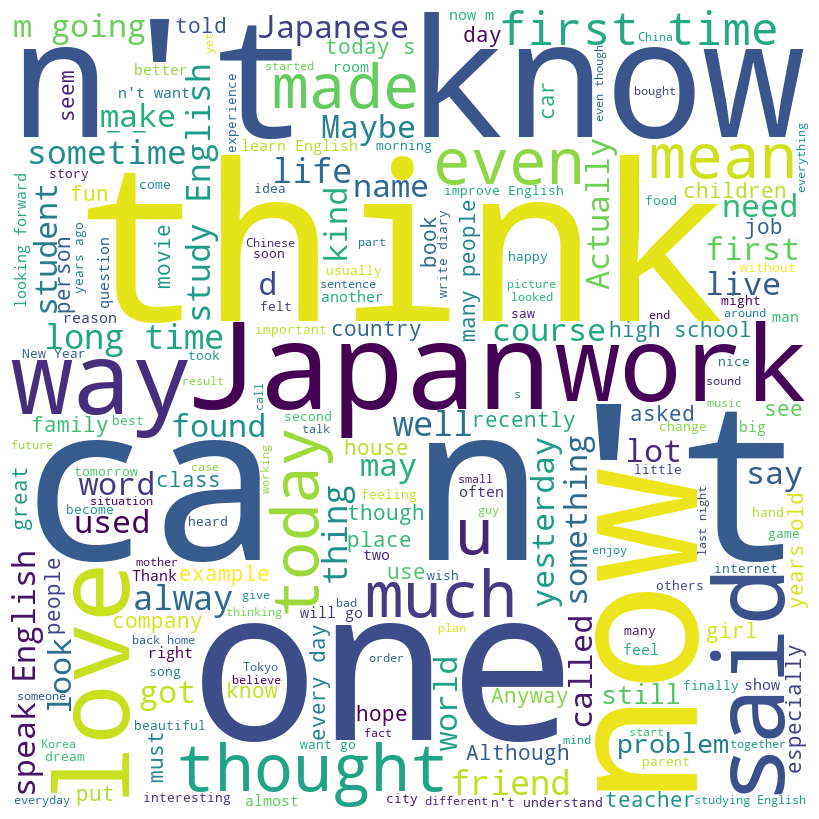

In [ ]:
error_text = " ".join(final_data['error']) #kết hợp tất cả các câu error lại thành 1 chuỗi, cách nhau bởi 1 spaces

stopwords = set(STOPWORDS)

filtered_text = ' '.join([word for word in error_text.split() if word.lower() not in stopwords]) #chuyển sang lowercase nếu không nằm trong stopword

wordcloud_no_stopwords = WordCloud(width = 800, height = 800, #đặt kích thước cho đám mây từ
                                   background_color ='white', 
                                   min_font_size = 10).generate(filtered_text) #đám mây từ cho các câu error

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_no_stopwords) #show ra đám mây từ cho các câu error
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

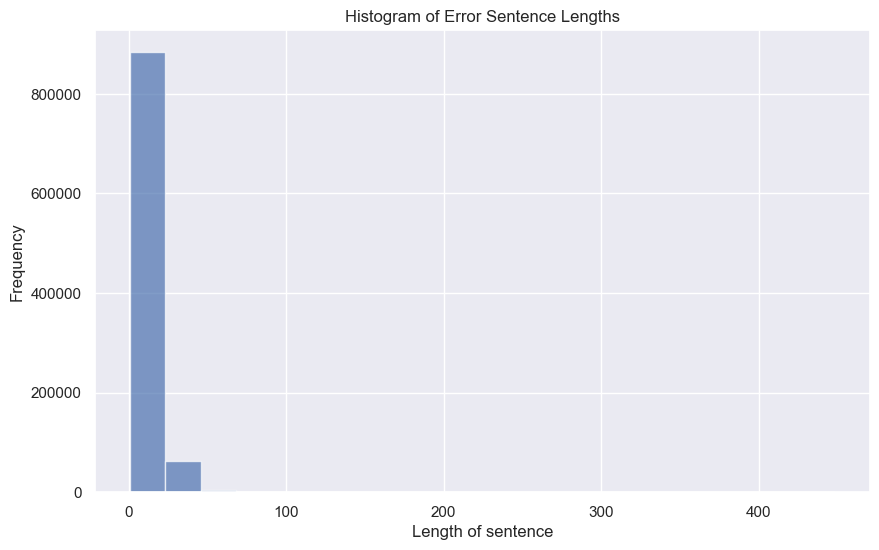

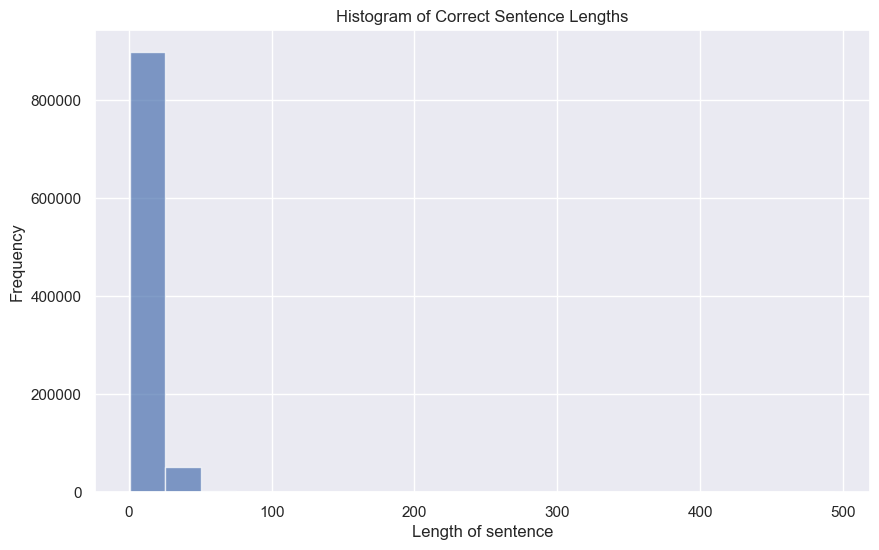

In [ ]:
def plot_sentence_length_histogram(data, column, title): # hàm tạo histogram cho độ dài của câu
    sentence_lengths = data[column].str.split().str.len() #tách từng câu thành từng từ và lấy độ dài của từng câu
    plt.figure(figsize=(10,6))
    plt.hist(sentence_lengths, bins=20, alpha=0.7) #tạo histogram với 20 bins, độ mờ là 0.7
    plt.title(f'Histogram of {title} Sentence Lengths') #đặt title
    plt.xlabel('Length of sentence') #đăt tên cho trục x
    plt.ylabel('Frequency') #đặt tên cho trục y
    plt.show()

plot_sentence_length_histogram(final_data, 'error', 'Error') #tạo histogram cho cột error 
plot_sentence_length_histogram(final_data, 'correct', 'Correct') #tạo histogram cho cột correct
#miền giá trị hiển thị trên histogram sẽ là độ dài câu nhỏ nhất => câu lớn nhất

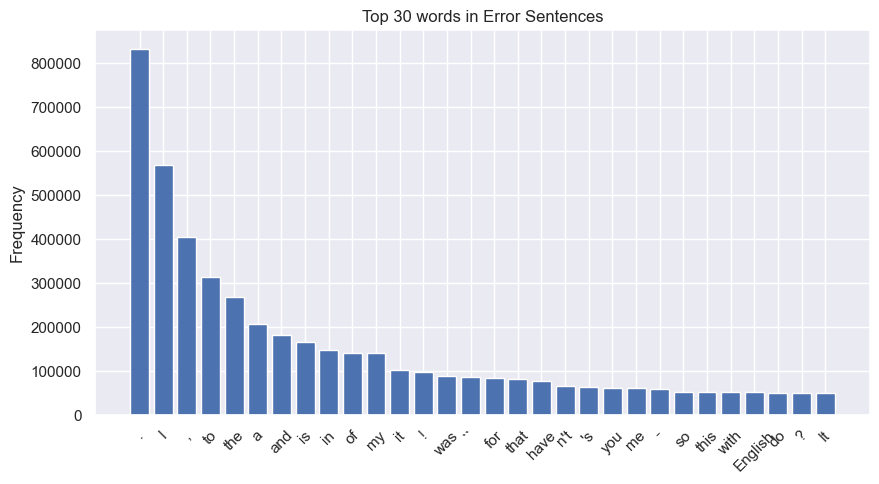

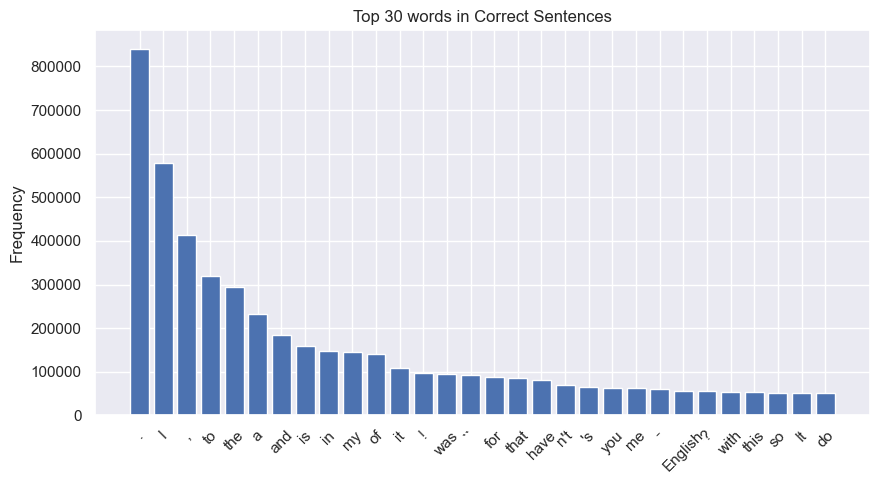

In [ ]:
from collections import Counter #thư viện dùng để đếm số lần xuất hiện của từng từ, Counter nhận vào list các từ và trả lại dictionary key:value là từ: số lần xuất hiện trong list

def plot_top_n_words(text, title, n=30): #hàm tạo biểu đồ cho top n từ xuất hiện nhiều nhất
    words = text.split() #tách từng từ trong câu
    counter = Counter(words) #đếm số lần xuất hiện của từng từ
    most_common = counter.most_common(n) #lấy top n từ xuất hiện nhiều nhất
    words, counts = zip(*most_common) #tách từng từ và số lần xuất hiện ra
    plt.figure(figsize=(10,5)) #đặt kích thước cho biểu đồ
    plt.bar(words, counts) #tạo biểu đồ bar trục x là các từ, trục y là số lần xuất hiện
    plt.title(f'Top {n} words in {title}') #đặt title là top n từ xuất hiện nhiều nhất
    plt.xticks(rotation=45) #xoay hiển thị label cho trục x 45 độ
    plt.ylabel('Frequency') #đặt tên cho trục y
    plt.show()

plot_top_n_words(error_text, 'Error Sentences') #in ra histogram top n word trong error_text
plot_top_n_words(correct_text, 'Correct Sentences') 

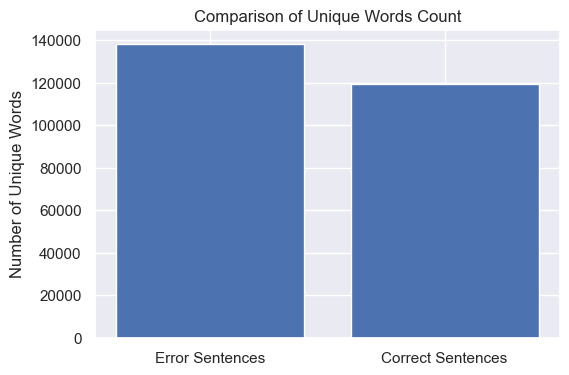

In [ ]:
unique_words_error = len(set(error_text.split())) #số lượng các từ khác nhau trong error text: set nhận vào là 1 list, tuple => trả lại set là set gồm các phẩn tử không lặp
unique_words_correct = len(set(correct_text.split())) #số lượng các từ khác nhau trong correct text
plt.figure(figsize=(6,4)) #vẽ biểu đồ size 6,4
plt.bar(['Error Sentences', 'Correct Sentences'], [unique_words_error, unique_words_correct]) #vẽ bều đồ bar
plt.title('Comparison of Unique Words Count')
plt.ylabel('Number of Unique Words')
plt.show()

In [ ]:
for i, row in enumerate(final_data['error']): #check từng câu trong cột error
  if row.split(" ") == final_data['correct'].iloc[i].split(" ") or len(row.split(" ")) >= 15 or len(row.split(" ")) <= 5: #nếu câu trong cột error giống câu trong cột correct hoặc độ dài câu error lớn hơn 15 hoặc nhỏ hơn 5
    final_data.iloc[i] = np.nan #thì gán giá trị null cho dòng đó

In [ ]:
final_data = final_data.dropna() #loại bỏ các dòng có giá trị null

In [ ]:
final_data.describe() #các dòng giống nhau ở cả 2 cột đã bị loại bỏ

,correct,error
count,290232,290232
unique,288169,289525
top,This is my first diary entry .,This is my first writing .
freq,20,5


In [ ]:
final_data

,correct,error
3,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
4,"Actually , he was the one who let me know about Lang - 8 . .","Actually , who let me know about Lang - 8 was him ."
6,His Kanji ability is much better than mine .,His Kanji 's ability is much better than me .
11,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .
15,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back ."
...,...,...
1037422,I got the result this dinner .,I got the reasult this dinner .
1037427,I keep a good mood taking vitamins and drinking herbal tea .,I keep a good mood up taking vitamins and drinking herbal tea .
1037439,Recently I started cleaning up my possessions .,Recently I started clean up my possessions .
1037443,"Next , I disposed my picture book .",Next I disposed my picture book .


In [ ]:
final_data.isna().any() #check xem có dòng nào có giá trị null không

correct    False
error      False
dtype: bool

In [ ]:
def decontracted(phrase): #hàm chuyển từ viết tắt thành từ đầy đủ
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"gon na", " going to", phrase)
    phrase = re.sub(r"wan na", " want to", phrase)
    phrase = re.sub(r"gonna", " going to", phrase)
    phrase = re.sub(r"wanna", " want to", phrase)


    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub("\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

def clean_text(t): #hàm bỏ dấu và ký tự unicode

  t = unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('ascii') 
  t = decontracted(t)

  t = re.sub(r'x D', '', t)
  t = re.sub(r': D', '', t)
  t = re.sub(r': P', '', t)

  t = re.sub(r'xD', '', t)
  t = re.sub(r':D', '', t)
  t = re.sub(r':P', '', t)

  if '(' in t and ')' in t: #loại bỏ nội dung trong dấu ngoặc đơn => Hello (world) => Hello
    try:
      t = re.sub(t.split("(")[-1].split(")")[0], '', t)
    except:
      pass
    #t = re.sub("(", '', t)
    #t = re.sub(")", '', t)

  t = re.sub(r'[^A-Za-z;!?.,\-\' ]+', ' ', t) #loại bỏ các emoji, số, ký tự đặc biệt

#chuẩn hóa dấu câu, thêm khoảng trống trước dâu câu. 
  t = re.sub(r'\.+',r' .',t)
  t = re.sub(r'\;+',r' , ',t)
  t = re.sub(r'!+',r' !',t )
  t = re.sub(r'\?+',r' ?',t )
  t = re.sub(r'\-+',r' - ',t )
  t = re.sub(r'\,+',r' , ',t )
  t = re.sub(r'\'+',r" ' ",t)
  t = re.sub(' +', ' ', t) #loại bỏ khoảng trắng thừa vd: "hello   world" => "hello world"

  return t #trả về văn bản được làm sạch

In [ ]:
final_data['correct'] = final_data['correct'].apply(clean_text) #áp dụng hàm clean_text cho cột correct
final_data['error'] = final_data['error'].apply(clean_text) #áp dụng hàm clean_text cho cột error

In [ ]:
final_data[:50] # in ra 50 dòng đầu tiên trong dataframe

,correct,error
3,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
4,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him ."
6,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .
11,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .
15,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back ."
17,"When everything is going smoothly , you have to be more modest .","When you are go smoothly , you have to be more modest ."
23,Making souvenirs is a hard but interesting work .,The making souvenir is a hard and interesting work .
36,"You know , you can ? them at a slot machine .","You know , you can take them at slot machine ."
38,The third memory is the house where we lived .,The third memory is the house we lived .
44,I liked Finland in the Winter .,I liked the winter Finland .


In [ ]:
final_data.describe() #check lại data sau khi đã xử lý

,correct,error
count,290232,290232
unique,286971,288715
top,,
freq,578,544


In [ ]:
final_data = final_data.drop_duplicates() #xóa các dòng trùng lặp
final_data = final_data.dropna() #xóa các dòng có giá trị null

In [ ]:
final_data.describe() #check lại data sau khi đã xử lý

,correct,error
count,289562,289562
unique,286971,288715
top,,
freq,70,32


In [ ]:
final_data.to_csv(r"C:\Users\Admin\Downloads\NLP\dataset\preprocessed_15.csv", index = False) #viết dataframe vào file csv

In [4]:
final_data = pd.read_csv(r"C:\Users\Admin\Downloads\NLP\dataset\preprocessed_15.csv") #load file csv

In [5]:
for i, row in enumerate(final_data['error']): #check từng câu trong cột error
  if row.split(" ") == final_data['correct'].iloc[i].split(" "): #nếu câu trong cột error giống câu trong cột correct
    final_data.iloc[i] = np.nan #thì gán giá trị null cho dòng đó

In [6]:
final_data = final_data.dropna() #loại bỏ các dòng có giá trị null

In [7]:
final_data.describe() #các dòng giống nhau ở cả 2 cột đã bị loại bỏ

,correct,error
count,288032,288032
unique,285482,287203
top,,
freq,69,31


In [8]:
import pandas as pd #thư viện dùng để tạo ma trận dữ liệu
import nltk #thư viện dùng để tokenization
nltk.download("punkt")#tải dữ liệu cho tokenization (bộ phân tách từ)
nltk.download("punkt_tab")
def identify_errors(row): #so sánh câu sai và đúng => tìm ra lỗi
    error_tokens = nltk.word_tokenize(row['error']) #chia câu lỗi thành từng token (mỗi token là 1 từ)
    correct_tokens = nltk.word_tokenize(row['correct']) #chia câu đúng thành từng token (mỗi token là 1 từ)
    return [word for word in error_tokens if word not in correct_tokens] #trả về các từ không nằm trong câu đúng nhưng có trong câu sai

final_data['identified_errors'] = final_data.apply(identify_errors, axis=1) #áp dụng hàm identify_errors cho từng dòng trong dataframe, tạo 1 cột mới là identified_errors chứa các từ sai

error_frequency = final_data['identified_errors'].explode().value_counts() #đếm số lần xuất hiện của từng từ sai

print(error_frequency.head(10)) #in ra 10 từ sai xuất hiện nhiều nhất

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


identified_errors
the    13394
is     12505
a      11793
to     11293
in      8823
,       8737
of      8193
.       7090
it      5693
for     5523
Name: count, dtype: int64


In [9]:
final_data.head(10)

,correct,error,identified_errors
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .,[subject]
1,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang - was him .",[him]
2,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .,[me]
3,I heard a sentence last night when I was watch...,I heard a sentence last night when I watched TV .,[watched]
4,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back .",[hvae]
5,"When everything is going smoothly , you have t...","When you are go smoothly , you have to be more...","[are, go]"
6,Making souvenirs is a hard but interesting work .,The making souvenir is a hard and interesting ...,"[The, making, souvenir, and]"
7,"You know , you can ? them at a slot machine .","You know , you can take them at slot machine .",[take]
8,The third memory is the house where we lived .,The third memory is the house we lived .,[]
9,I liked Finland in the Winter .,I liked the winter Finland .,[winter]


In [1]:
final_data.to_csv(r"C:\Users\Admin\Downloads\NLP\dataset\final_preprocessed_15.csv", index = False) #viết lại vào file csv

NameError: name 'final_data' is not defined

In [3]:
final_data = pd.read_csv(r"C:\Users\Admin\Downloads\NLP\dataset\final_preprocessed_15.csv") #đọc file csv

In [4]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ] #tạo list lưu độ dài của từng câu trong cột correct
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ] #tạo list lưu độ dài của từng câu trong cột error

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

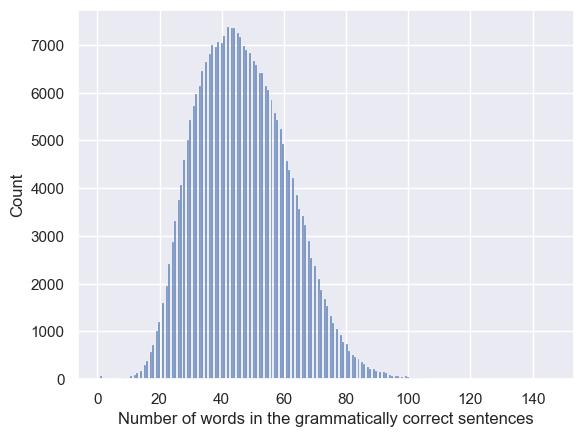

In [5]:
sns.set_theme()
ax = sns.histplot(data=len_1) #tạo histogram cho độ dài của câu trong cột correct
ax.set_xlabel('Number of words in the grammatically correct sentences') #đặt tên cho trục x

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

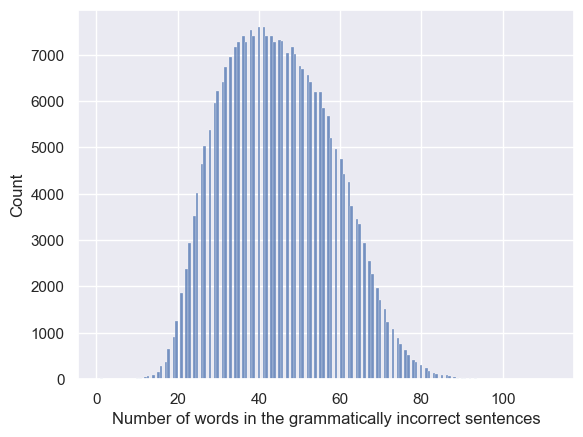

In [6]:

sns.set_theme()
ax = sns.histplot(data=len_2) #tạo histogram cho độ dài của câu trong cột error
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

# GEC_Baseline_Attention

In [7]:
import re
import datetime
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import keras
import tensorflow as tf
from sklearn.metrics import fbeta_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.translate.bleu_score import sentence_bleu
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\NLP\dataset\final_preprocessed_15.csv")

In [9]:
pd.options.display.max_colwidth = 500 #đặt giới hạn chiều rộng của cột để display dataframe
data[:50]

,correct,error,identified_errors
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .,['subject']
1,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him .",['him']
2,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .,['me']
3,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .,['watched']
4,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back .",['hvae']
5,"When everything is going smoothly , you have to be more modest .","When you are go smoothly , you have to be more modest .","['are', 'go']"
6,Making souvenirs is a hard but interesting work .,The making souvenir is a hard and interesting work .,"['The', 'making', 'souvenir', 'and']"
7,"You know , you can ? them at a slot machine .","You know , you can take them at slot machine .",['take']
8,The third memory is the house where we lived .,The third memory is the house we lived .,[]
9,I liked Finland in the Winter .,I liked the winter Finland .,['winter']


In [60]:
def preprocess(t, add_start_token, add_end_token):

  if add_start_token == True and add_end_token == False: #nếu thêm start token và không thêm end token
    t = '<start>'+' '+t
  if add_start_token == False and add_end_token == True: #nếu không thêm start token và thêm end token
    t = t+' '+'<end>'
  if add_start_token == True and add_end_token == True: #nếu thêm cả start token và end token
    t = '<start>'+' '+t+' '+'<end>'

  t = re.sub(' +', ' ', t) #loại bỏ khoảng trắng thừa
  return t

In [11]:
encoder_input = [preprocess(line, add_start_token= True, add_end_token=True) for line in data['error']]
decoder_input = [preprocess(line, add_start_token= True, add_end_token=False) for line in data['correct']]
decoder_output = [preprocess(line, add_start_token= False, add_end_token=True) for line in data['correct']]

In [12]:
print(encoder_input[0]) # in ra dòng đầu tiên của encoder_input
print(decoder_input[0]) 
print(decoder_output[0]) #output của ecoder output
print(len(encoder_input), len(decoder_input), len(decoder_output)) #số lượng dòng trong 3 cột

<start> And he took in my favorite subject like soccer . <end>
<start> And he took in my favorite subjects like soccer .
And he took in my favorite subjects like soccer . <end>
288032 288032 288032


In [56]:
tokenizer = Tokenizer(filters='', split=" ")
tokenizer.fit_on_texts(encoder_input)
word_index = tokenizer.word_index #tạo index cho token

max_length = max([ len(row.split(" ")) for row in encoder_input ]) #tìm độ dài lớn nhất của câu trong encoder_input
INPUT_ENCODER_LENGTH = max_length 

enc_input_encoded = tokenizer.texts_to_sequences(encoder_input) #tokenize các từ thành dạng index
enc_input_padded= pad_sequences(enc_input_encoded, maxlen=INPUT_ENCODER_LENGTH, padding="post") #đệm các câu để có cùng độ dài thành câu lớn nhất

print(enc_input_padded.shape)

(288032, 17)


In [14]:
print(encoder_input[0]) #in ra câu đầu tiên của encoder_input
print(enc_input_padded[0]) #sau khi được chuyển sang index và padding

<start> And he took in my favorite subject like soccer . <end>
[  1  11  46 177  13  10 280 901  39 615   3   2   0   0   0   0   0]


In [57]:
decoder_data = decoder_input.copy() #copy decoder_input sang decoder_data
decoder_data.extend(decoder_output) #nối decoder_output vào cuối decoder_data

out_tokenizer = Tokenizer(filters='', split=" ") #tạo tokenizer cho decoder_data
out_tokenizer.fit_on_texts(decoder_data) #fit dữ liệu vào tokenizer
word_index = out_tokenizer.word_index #tạo index cho từ

max_length = max([ len(row.split(" ")) for row in decoder_input ]) #tìm độ dài lớn nhất của câu trong decoder_input
INPUT_DECODER_LENGTH = max_length

In [16]:
dec_input_encoded = out_tokenizer.texts_to_sequences(decoder_input) #chuyển các từ thành index
dec_input_padded= pad_sequences(dec_input_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating = "post") #đệm các câu để có cùng độ dài thành câu lớn nhất

print(dec_input_padded.shape)

(288032, 29)


In [17]:
print(decoder_input[0]) #in ra câu đầu tiên của decoder_input
print(dec_input_padded[0]) #sau khi được chuyển sang index và padding

<start> And he took in my favorite subjects like soccer .
[   3   12   46  178   13   10  266 1499   41  608    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [18]:
dec_output_encoded = out_tokenizer.texts_to_sequences(decoder_output) #chuyển các từ thành index
dec_output_padded= pad_sequences(dec_output_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating = "post") #đệm các câu để có cùng độ dài thành câu lớn nhất

print(dec_output_padded.shape)

(288032, 29)


In [19]:
print(decoder_output[1])
print(dec_output_padded[1])

Actually , he was the one who let me know about Lang - . . <end>
[269   6  46  17   5  60 106 316  26  74  37 169  44   1   1   4   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [20]:
import io #thư viện dùng để xử lý file

def load_vectors(fname): #hàm load vector từ file
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore') #mở file
    n, d = map(int, fin.readline().split()) #đọc số lượng từ và số chiều của từ
    data = {} #tạo dictionary lưu từ và vector
    for line in fin: #đọc từng dòng trong file
        tokens = line.rstrip().split(' ') #tách từng từ và vector
        data[tokens[0]] = np.asarray(tokens[1:]) #lưu từ và vector vào dictionary
    return data

In [16]:
embedding_index = load_vectors(r"C:\Users\Admin\Downloads\NLP\dataset\wiki-news-300d-1M-subword.vec") #load vector từ file

In [35]:
word_index = tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items(): #tìm các từ thuộc câu error trong từ điền từ, nếu từ nào không có trong từ điển thì coi là misses. Nếu từ nào đã có trong từ điển thì được coi là hit
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save(r"C:\Users\Admin\Downloads\NLP\dataset\in_embedding.npy", embedding_matrix)

NameError: name 'embedding_index' is not defined

In [65]:
word_index = out_tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save(r"C:\Users\Admin\Downloads\NLP\dataset\out_embedding.npy", embedding_matrix)

Converted 28633 words (12426 misses)


In [21]:
in_embedding_matrix = np.load(r"C:\Users\Admin\Downloads\NLP\dataset\in_embedding.npy")
out_embedding_matrix = np.load(r"C:\Users\Admin\Downloads\NLP\dataset\out_embedding.npy")
print(in_embedding_matrix.shape, out_embedding_matrix.shape)

(52381, 300) (41061, 300)


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Encoder(nn.Module):
    def __init__(self, inp_vocab_size, embedding_size, lstm_size, input_length):
        super(Encoder, self).__init__()
        self.vocab_size = inp_vocab_size #số lượng từ vựng
        self.embedding_size = embedding_size
        self.lstm_units = lstm_size
        self.input_length = input_length

        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(in_embedding_matrix), freeze=True,padding_idx=0)
        self.lstm = nn.LSTM(self.embedding_size, self.lstm_units,batch_first=True)
    def forward(self,input_sequence,states):
        input_embedding = self.embedding(input_sequence)
        self.lstm_output, (self.state_h, self.state_c) = self.lstm(input_embedding, states)
        return self.lstm_output, self.state_h, self.state_c
    def initialize_states(self,batch_size):
        lstm_state_h = torch.zeros((1,batch_size,self.lstm_units)).to(device)
        lstm_state_c = torch.zeros((1,batch_size,self.lstm_units)).to(device)
        return lstm_state_h, lstm_state_c

In [23]:
def dot_func(encoder_output,decoder_hidden_state):
    decoder_hidden_state = torch.reshape(decoder_hidden_state,[decoder_hidden_state.shape[1],1,decoder_hidden_state.shape[2]])
    dot_product = torch.matmul(encoder_output,decoder_hidden_state.transpose(1,2))
    return dot_product

In [24]:
class Attention(nn.Module):
    def __init__(self,scoring_function, att_units):
        super(Attention,self).__init__()
        self.scoring_function = scoring_function
        self.att_units = att_units
        self.timesteps = 0
    def forward(self,decoder_hidden_state,encoder_output):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        encoder_output = encoder_output.to(device)
        decoder_hidden_state = decoder_hidden_state.to(device)
        if self.scoring_function == 'dot':
            alpha = F.softmax(dot_func(encoder_output,decoder_hidden_state),dim = 1)
            c_t = torch.sum(alpha *encoder_output,dim = 1)
            return c_t,alpha


In [25]:
class One_Step_Decoder(nn.Module):
    def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
        super(One_Step_Decoder,self).__init__()

        self.tar_vocab_size = tar_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(out_embedding_matrix), freeze=True,padding_idx=0)
        self.lstm = nn.LSTM(self.dec_units + self.embedding_dim,self.dec_units,batch_first=True)
        self.dense = nn.Linear(self.dec_units,self.tar_vocab_size)
    def forward(self,input_to_decoder,encoder_output,state_h,state_c):
        input_embedding = self.embedding(input_to_decoder)
        if self.score_fun == "dot":
            attention = Attention("dot",self.att_units)
            context_vector,attention_weights = attention(state_h,encoder_output)
        out = torch.cat([input_embedding,context_vector.unsqueeze(1)],dim = 2)
        self.lstm_output, (self.state_h, self.state_c_) = self.lstm(out, (state_h,state_c))
        result_out = self.dense(self.lstm_output)
        return result_out.squeeze(1), self.state_h, self.state_c_, attention_weights, context_vector

In [26]:
class Decoder(nn.Module):
    def __init__(self,out_vocab_size,embedding_dim,input_length,dec_units, score_fun,att_units):
        super(Decoder,self).__init__()
        self.out_vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.dec_units = dec_units
        self.score_fun = score_fun
        self.att_units = att_units
        self.one_step_decoder = One_Step_Decoder(self.out_vocab_size, self.embedding_dim, self.input_length, self.dec_units ,self.score_fun ,self.att_units)
    def forward(self,input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        input_to_decoder = input_to_decoder.to(device)
        encoder_output = encoder_output.to(device)
        decoder_hidden_state = decoder_hidden_state.to(device)
        decoder_cell_state = decoder_cell_state.to(device)

        batch_size, timesteps = input_to_decoder.shape
        out_array = torch.zeros((batch_size, timesteps, self.one_step_decoder.tar_vocab_size)).to(device)

        for timestep in range(timesteps):
            output,decoder_hidden_state,decoder_cell_state,_,_ = self.one_step_decoder(input_to_decoder[:,timestep:timestep+1],encoder_output,decoder_hidden_state,decoder_cell_state)
            out_array[:,timestep,:] = output
        return out_array

In [27]:
class encoder_decoder(nn.Module):
    def __init__(self,enc_units,dec_units,scoring_func,att_units):
        super(encoder_decoder,self).__init__()
        self.scoring_func = scoring_func
        self.att_units = att_units
        self.dec_units = dec_units
        self.enc_units = enc_units
        self.encoder = Encoder(INPUT_VOCAB_SIZE, embedding_size = 300, lstm_size= self.enc_units , input_length= INPUT_ENCODER_LENGTH)
        self.decoder = Decoder(OUTPUT_VOCAB_SIZE, embedding_dim=300, input_length = None, dec_units= self.dec_units ,score_fun =self.scoring_func,att_units = self.att_units)
    
    def forward(self,data):
        input,output = data[0],data[1]
        states = self.encoder.initialize_states(input.shape[0])
        encoder_output,encoder_final_state_h,encoder_final_state_c = self.encoder(input, states)
        decoder_output = self.decoder(output,encoder_output, encoder_final_state_h, encoder_final_state_c)
        return decoder_output

In [28]:
INPUT_VOCAB_SIZE = len(list(tokenizer.word_index)) +2 #kích thước từ vựng đầu vào +2 là do thêm start token và end token
OUTPUT_VOCAB_SIZE = len(list(out_tokenizer.word_index)) +2 #tương tự như trên
print(INPUT_VOCAB_SIZE, INPUT_ENCODER_LENGTH, OUTPUT_VOCAB_SIZE, INPUT_DECODER_LENGTH) #in ra kích thước tập từ vựng, đọ dài câu, kích thước tập từ vựng đầu ra, độ dài câu đầu ra, kích thước batch

52381 17 41061 29


In [29]:
import torch
import torch.nn as nn
class Seq2SeqDataset(torch.utils.data.Dataset):
    def __init__(self,enc_input_padded,dec_input_padded,dec_output_padded):
        self.enc_input_padded = torch.tensor(enc_input_padded)
        self.dec_input_padded = torch.tensor(dec_input_padded)
        self.dec_output_padded = torch.tensor(dec_output_padded)
    def __len__(self):
        return len(self.enc_input_padded)
    def __getitem__(self,idx):
        return self.enc_input_padded[idx],self.dec_input_padded[idx],self.dec_output_padded[idx]


dataset = Seq2SeqDataset(enc_input_padded,dec_input_padded,dec_output_padded)
test_size = int(len(dataset)*0.3)
train_size = len(dataset) - test_size
train_dataset,test_dataset = torch.utils.data.random_split(dataset,[train_size,test_size])

In [30]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size = 32,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size = 32,shuffle = False)

In [31]:
for a,b,c in train_loader:
    print(a.shape)
    print(b.shape)
    print(c.shape)
    break
#thử cho encoder_input_padded đi qua lớp embedding
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
a,b,c = next(iter(train_loader))
a = torch.randint(0, 1000, (32,17, 256)).to(device).float()
b = torch.randint(0, 1000, (32,1 ,256)).to(device).float()
c= torch.matmul(a,b.transpose(1,2))
print("Alo", c.shape)
alpha = F.softmax(c, dim=1)
print(torch.sum(alpha * a, dim=1).shape)
#thử lớp LSTM
embedding = nn.Embedding.from_pretrained(torch.FloatTensor(in_embedding_matrix), freeze=True,padding_idx=0).to(device)
a = torch.randint(0, 1000, (32,17)).to(device).long()
print(embedding(a).shape)
lstm = nn.LSTM(300,256,batch_first=True).to(device)
lstm_output, (state_h, state_c) = lstm(embedding(a))
print(lstm_output.shape, state_h.shape, state_c.shape)

context_vecto = torch.randn(size = (32, 256)).to(device)
context_vecto = context_vecto.unsqueeze(1)
print(context_vecto.shape)
input_embedding = torch.randn(size = (32, 1, 300)).to(device)
print(torch.cat([input_embedding,context_vecto],dim =2).shape)

torch.Size([32, 17])
torch.Size([32, 29])
torch.Size([32, 29])
Alo torch.Size([32, 17, 1])
torch.Size([32, 256])
torch.Size([32, 17, 300])
torch.Size([32, 17, 256]) torch.Size([1, 32, 256]) torch.Size([1, 32, 256])
torch.Size([32, 1, 256])
torch.Size([32, 1, 556])


In [32]:
model = encoder_decoder(enc_units=512,dec_units=512,scoring_func="dot",att_units=256)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()

encoder_decoder(
  (encoder): Encoder(
    (embedding): Embedding(52381, 300, padding_idx=0)
    (lstm): LSTM(300, 512, batch_first=True)
  )
  (decoder): Decoder(
    (one_step_decoder): One_Step_Decoder(
      (embedding): Embedding(41061, 300, padding_idx=0)
      (lstm): LSTM(812, 512, batch_first=True)
      (dense): Linear(in_features=512, out_features=41061, bias=True)
    )
  )
)

In [33]:
#tổng tham số của mô hình
total_params = sum(p.numel() for p in model.parameters())

#tổng tham số huấn luyện
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Tham số của mô hình: {total_params}")
print(f"Tham số huấn luyện: {trainable_params}")

Tham số của mô hình: 53479613
Tham số huấn luyện: 25447013


In [34]:
#kiểm tra shape của dữ liệu
for (a,b,c) in train_loader:
    print(a.shape,b.shape,c.shape)
    break

torch.Size([32, 17]) torch.Size([32, 29]) torch.Size([32, 29])


In [35]:
#test thử đầu ra của model
for (a,b,c) in train_loader:
    a = a.to(device)
    b = b.to(device)
    c = c.to(device)
    print(model([a,b]).shape)
    break

torch.Size([32, 29, 41061])


In [36]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, path='checkpoint.pt'):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.best_loss = float('inf')
        self.counter = 0

    def __call__(self, val_loss, model,epoch):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
            torch.save(model.state_dict(), self.path)  # Lưu model tốt nhất
            print(f"✅ Model từ epoch {epoch+1} đã được lưu tại {self.path}.")
        else:
            self.counter += 1
            print(f"❌ Model từ epoch {epoch+1} không được lưu.")
            if self.counter >= self.patience:
                print("Early stopping triggered!")
                return True
        return False

In [59]:
#đăng nhập vào wandb
import wandb
wandb.login(key = "1a1e9d904fb11812f635b8c3f9a93ae09da4cd04")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Admin\_netrc
wandb: Currently logged in as: quoc-trieu-geckokidz (quoc-trieu-geckokidz-hust) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [60]:
wandb.init(project="project_nlp", name="first_run", config={"epochs": 20, "lr": 1e-3,"time":datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")})

In [61]:
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm  # Import tqdm để hiển thị tiến trình

def train_model(model, train_loader, val_loader, num_epochs=20, lr=1e-3, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)
    early_stopping = EarlyStopping(patience=patience)
    loss_function = nn.CrossEntropyLoss(ignore_index=0)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0

        # Thanh tiến trình cho Training
        train_progress = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]", leave=False)

        for enc_input_padded, dec_input_padded, dec_output_padded in train_progress:
            optimizer.zero_grad()

            enc_input_padded = enc_input_padded.to(device)
            dec_input_padded = dec_input_padded.to(device)
            dec_output_padded = dec_output_padded.to(device)

            outputs = model([enc_input_padded, dec_input_padded])
            outputs = outputs.view(-1, outputs.size(-1))  # (batch_size * seq_len, vocab_size)
            targets = dec_output_padded.view(-1)  # (batch_size * seq_len)

            loss = loss_function(outputs.float(), targets.long())
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_progress.set_postfix(loss=loss.item())
        train_loss /= len(train_loader)

        # ----- Validation -----
        model.eval()
        val_loss = 0

        val_progress = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]", leave=False)

        with torch.no_grad():
            for enc_input_padded, dec_input_padded, dec_output_padded in val_progress:
                enc_input_padded = enc_input_padded.to(device)
                dec_input_padded = dec_input_padded.to(device)
                dec_output_padded = dec_output_padded.to(device)

                outputs = model([enc_input_padded, dec_input_padded])
                outputs = outputs.view(-1, outputs.size(-1))
                targets = dec_output_padded.view(-1)

                loss = loss_function(outputs.float(), targets.long())
                val_loss += loss.item()
                val_progress.set_postfix(val_loss=loss.item())

        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

        # Log thông số lên WandB
        wandb.log({"epoch": epoch+1, "train_loss": train_loss, "val_loss": val_loss, "learning_rate": optimizer.param_groups[0]["lr"]})

        scheduler.step(val_loss)

        # Lưu mô hình nếu có cải thiện
        if early_stopping(val_loss, model, epoch):
            wandb.run.summary["best_val_loss"] = val_loss
            torch.save(model.state_dict(), "best_model.pth")
            wandb.save("best_model.pth")
            break

    # Kết thúc phiên làm việc với WandB
    wandb.finish()

In [62]:
#train model
train_model(model, train_loader, test_loader, num_epochs=20, lr=1e-3, patience=5)

Epoch 1/20 - Train Loss: 3.1976 - Val Loss: 2.1509
✅ Model từ epoch 1 đã được lưu tại checkpoint.pt.


Epoch 2/20 - Train Loss: 1.8118 - Val Loss: 1.7541
✅ Model từ epoch 2 đã được lưu tại checkpoint.pt.


Epoch 3/20 - Train Loss: 1.4457 - Val Loss: 1.6414
✅ Model từ epoch 3 đã được lưu tại checkpoint.pt.


Epoch 4/20 - Train Loss: 1.2425 - Val Loss: 1.6132
✅ Model từ epoch 4 đã được lưu tại checkpoint.pt.


Epoch 5/20 - Train Loss: 1.1122 - Val Loss: 1.5967
✅ Model từ epoch 5 đã được lưu tại checkpoint.pt.


Epoch 6/20 - Train Loss: 1.0232 - Val Loss: 1.5941
✅ Model từ epoch 6 đã được lưu tại checkpoint.pt.


Epoch 7/20 - Train Loss: 0.9564 - Val Loss: 1.5937
✅ Model từ epoch 7 đã được lưu tại checkpoint.pt.


Epoch 8/20 - Train Loss: 0.9015 - Val Loss: 1.6059
❌ Model từ epoch 8 không được lưu.


KeyboardInterrupt: 

In [105]:
model.load_state_dict(torch.load(r"C:\Users\Admin\Downloads\NLP\best_model.pth"))
model.to(device)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22052\2455360464.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r"C:\Users\Admin\Downloads\

encoder_decoder(
  (encoder): Encoder(
    (embedding): Embedding(52381, 300, padding_idx=0)
    (lstm): LSTM(300, 512, batch_first=True)
  )
  (decoder): Decoder(
    (one_step_decoder): One_Step_Decoder(
      (embedding): Embedding(41061, 300, padding_idx=0)
      (lstm): LSTM(812, 512, batch_first=True)
      (dense): Linear(in_features=512, out_features=41061, bias=True)
    )
  )
)

In [101]:
model.eval()

encoder_decoder(
  (encoder): Encoder(
    (embedding): Embedding(52381, 300, padding_idx=0)
    (lstm): LSTM(300, 512, batch_first=True)
  )
  (decoder): Decoder(
    (one_step_decoder): One_Step_Decoder(
      (embedding): Embedding(41061, 300, padding_idx=0)
      (lstm): LSTM(812, 512, batch_first=True)
      (dense): Linear(in_features=512, out_features=41061, bias=True)
    )
  )
)

In [58]:
def input_processor(input_sentence, pad_seq): #chuyển câu đầu vào và chuyển thành index, thêm padding cần thiết để đưa vào encoder (phục vụ cho test model)

  encoder_input = preprocess(input_sentence, add_start_token= True, add_end_token=True)

  tokenized_text = tokenizer.texts_to_sequences([encoder_input])
  if pad_seq == True:
    tokenized_text = pad_sequences(tokenized_text, maxlen=INPUT_ENCODER_LENGTH, padding="post")

  tokenized_text = tf.convert_to_tensor(tokenized_text, dtype = tf.float32)
  return tokenized_text

In [66]:
input_sentence = "I love you ."
print(preprocess(input_sentence, True,True))
pad_seq = True
input_tensor = input_processor(input_sentence,pad_seq)

<start> I love you . <end>


In [106]:
import torch

def predict_sentence(model, tokenizer, out_tokenizer, input_sentence, max_length=29, device="cuda"):
    model.eval()  # Chuyển model sang chế độ eval

    start_token_in = 1  # Start token của tokenizer (input)
    end_token_in = 2    # End token của tokenizer (input)
    start_token_out = 3  # Start token của out_tokenizer (output)
    end_token_out = 4    # End token của out_tokenizer (output)

    # 1️⃣ Xử lý đầu vào (encoder_input)
    input_tensor = input_processor(input_sentence, pad_seq=True)  # Đưa vào hàm tiền xử lý có sẵn
    input_tensor = torch.tensor(input_tensor.numpy(), dtype=torch.long).to(device)  # (1, 17)

    # 2️⃣ Khởi tạo decoder_input với start token
    decoder_input = torch.tensor([[start_token_out]], dtype=torch.long).to(device)  # (1,1)

    predicted_sentence = []

    with torch.no_grad():  # Không cần tính gradient khi inference
        for _ in range(max_length):  # Giới hạn tối đa 29 từ
            # 3️⃣ Dự đoán từ tiếp theo
            output = model([input_tensor, decoder_input])  # (1, seq_len, vocab_size)

            # 4️⃣ Chọn từ có xác suất cao nhất (Greedy Search)
            next_word = torch.argmax(output[:, -1, :], dim=-1).item()

            # 5️⃣ Nếu gặp token <end> thì dừng lại
            if next_word == end_token_out:
                break

            # 6️⃣ Thêm từ vào kết quả
            predicted_sentence.append(next_word)

            # 7️⃣ Cập nhật decoder_input để tiếp tục sinh từ mới
            next_word_tensor = torch.tensor([[next_word]], dtype=torch.long).to(device)  # (1,1)
            decoder_input = torch.cat([decoder_input, next_word_tensor], dim=1)  # Nối thêm từ vào decoder_input

            # 8️⃣ Nếu đã đạt độ dài tối đa 29 thì dừng
            if decoder_input.shape[1] >= max_length:
                break

    # 9️⃣ Chuyển index thành câu hoàn chỉnh sử dụng out_tokenizer
    predicted_words = [out_tokenizer.index_word.get(idx, "<unk>") for idx in predicted_sentence]
    
    return " ".join(predicted_words)

# 🛠 Test với một câu đầu vào
input_sentence = "Ronaldo are the best football player ."
output_sentence = predict_sentence(model, tokenizer, out_tokenizer, input_sentence)
print("Generated Sentence:", output_sentence)


Generated Sentence: messi is the best football player .


In [ ]:
def input_processor(input_sentence, pad_seq): #chuyển câu đầu vào và chuyển thành index, thêm padding cần thiết để đưa vào encoder (phục vụ cho test model)

  encoder_input = preprocess(input_sentence, add_start_token= True, add_end_token=True)

  tokenized_text = tokenizer.texts_to_sequences([encoder_input])
  if pad_seq == True:
    tokenized_text = pad_sequences(tokenized_text, maxlen=INPUT_ENCODER_LENGTH, padding="post")

  tokenized_text = tf.convert_to_tensor(tokenized_text, dtype = tf.float32)
  return tokenized_text


def remove_end_token(words):
  words_list = words.split(' ')[:-1]
  words = " ".join(words_list)
  return words

In [ ]:
def plot_attention(AW, IN, OUT): #giúp trực quan attention weights giữa các từ trong câu đầu vào và câu đầu ra
  print(IN)
  print(OUT)
  plt.figure(figsize = (8,6))
  sns.set_theme()
  ax = sns.heatmap(AW,xticklabels =  IN.split(" "), yticklabels= OUT.split(" "))
  ax.set_title('Attention weights')
  ax.set_xlabel('encoder_input')
  ax.set_ylabel('decoder_output')

In [ ]:
def predict(input_sentence): #sử dụng model đã lưu để test với các câu đầu vào mới

  input = input_processor(input_sentence, pad_seq = False)

  NUMBER_OF_INPUTS = input.shape[0]

  states = model.layers[0].initialize_states(NUMBER_OF_INPUTS)

  encoder_output,encoder_final_state_h, encoder_final_state_c = model.layers[0](input, states)

  input_decoder = np.zeros((1,1))
  input_decoder[0][0] = 2

  attention_wts = []
  decoder_output_list = []

  stop = False

  while stop != True:
    decoder_output,decoder_state_h,decoder_state_c, attention_weights, context_vector = model.layers[1].one_step_decoder(input_decoder, encoder_output, encoder_final_state_h, encoder_final_state_c)

    encoder_final_state_h = decoder_state_h
    encoder_final_state_c = decoder_state_c

    index = np.argmax(decoder_output,-1)
    attention_wts.append(attention_weights)
    decoder_output_list.append(index)

    input_decoder = np.asarray(index, dtype = np.float32)
    input_decoder = np.reshape(input_decoder, (NUMBER_OF_INPUTS,1))

    if input_decoder[0][0] == 4 or len(decoder_output_list) > input.shape[1]:
      stop =True

  arr_out = [int(np.asarray(i)) for i in decoder_output_list]

  output_words = out_tokenizer.sequences_to_texts([arr_out])

  return output_words, attention_wts


In [ ]:
def translate(sent, ind, plot_attention_): #từ đầu ra của model là index => chuyển thành từ và vẽ attention weights
  out, attention_weights = predict(sent)

  OUT = out[0]
  IN = encoder_input[ind]

  if plot_attention_ == True:
    attention_weights = np.asarray(attention_weights)
    AW = np.reshape(attention_weights,(attention_weights.shape[0], attention_weights.shape[2]))
    plot_attention(AW, IN, OUT)

  return OUT

<start> And he took in my favorite subject like soccer . <end>
and took the my favorite subjects like soccer . <end>


'and took the my favorite subjects like soccer . <end>'

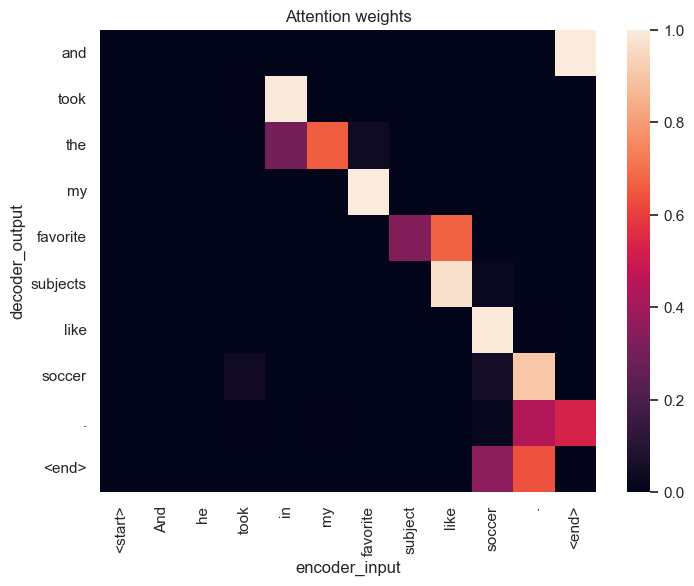

In [ ]:
translate(data['error'].loc[0], 0, plot_attention_= True) #vẽ các biểu đồ thể hiện độ liên quan giữa từ ở câu đầu vào đối với các từ ở câu đàu ra

<start> His Kanji is ability is much better than me . <end>
his kanji ability is much better than me . <end>


'his kanji ability is much better than me . <end>'

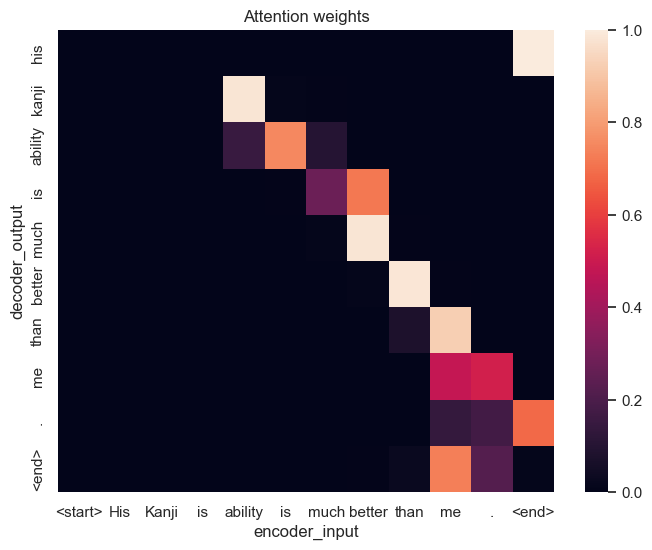

In [91]:
translate(data['error'].loc[2], 2, plot_attention_= True)

<start> You know , you can take them at slot machine . <end>
you know , you can leave them on a slot machine . <end>


'you know , you can leave them on a slot machine . <end>'

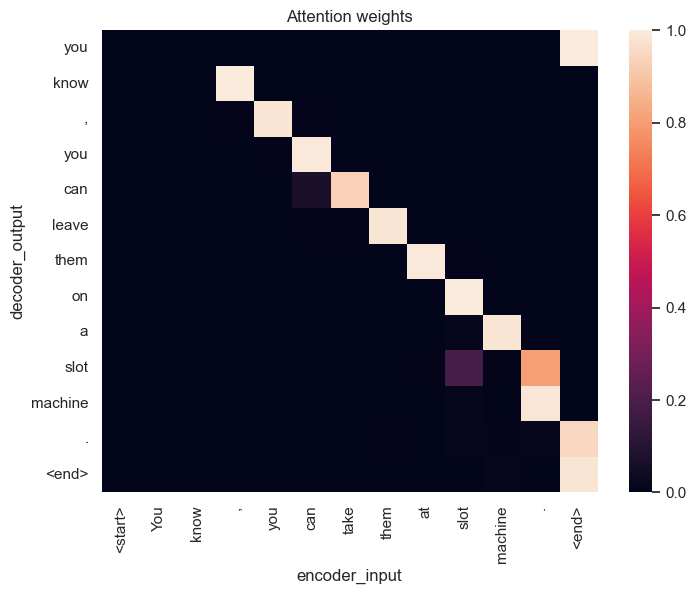

In [92]:
translate(data['error'].loc[7], 7, plot_attention_= True)

<start> If only I had black dense curtains . <end>
even only had a black curtains curtains . <end>


'even only had a black curtains curtains . <end>'

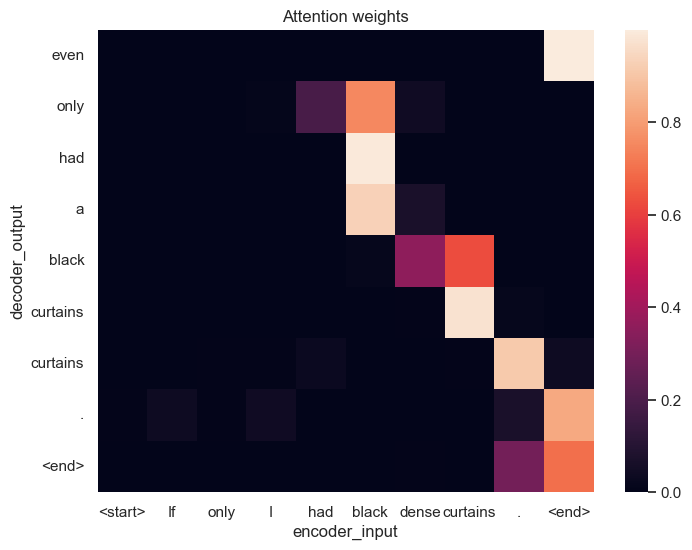

In [93]:
translate(data['error'].loc[11],11, plot_attention_= True)

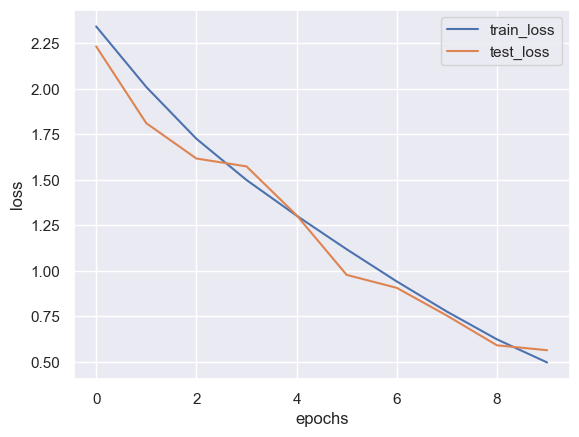

In [100]:
df= pd.read_csv('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/history_1.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#tính BLEU score
indices = [i for i in range(50)]
sent_list = [data['error'].loc[i] for i in indices]
bleu_scores_ = []
actual_output = []
output_sent_list = []

for i, sent in enumerate(tqdm(sent_list)):
  out,_ = predict(sent)
  actual_ = decoder_output[indices[i]]

  output_sent_list.append(out[0])
  actual_output.append(actual_)

  out_words = remove_end_token(out[0])
  actual_output_ = remove_end_token(actual_)

  bleu_scores_.append(sentence_bleu(actual_output_.split(' '), out_words.split(' ')))

print('Average BLEU score :',sum(bleu_scores_)/len(bleu_scores_))

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently 

Average BLEU score : 1.1908319823462085e-231


In [ ]:
#test các câu trong tập train và tính BLEU score
df = pd.DataFrame(columns= ['input_sentence', 'actual_output','translated_output', 'bleu_score'])
df['input_sentence'] = sent_list
df['actual_output'] = actual_output
df['translated_output'] = output_sent_list
df['bleu_score'] = bleu_scores_

In [ ]:
df[:50] #in ra 50 câu đầu tiên


,input_sentence,actual_output,translated_output,bleu_score
0,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer . <end>,and took the my favorite subjects like soccer . <end>,1.051835e-231
1,"Actually , who let me know about Lang - was him .","Actually , he was the one who let me know about Lang - . . <end>","actually , who one one let me know what know about lang . <end>",1.140985e-231
2,His Kanji is ability is much better than me .,His Kanji ability is much better than mine . <end>,his kanji ability is much better than me . <end>,1.051835e-231
3,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watching TV . <end>,i heard a sentence last night when i watched tv . <end>,1.316559e-231
4,"When you go uphill , you hvae to bend your back .","When you go uphill , you have to bend your back . <end>","when you go uphill , you have to bend your back . <end>",1.164047e-231
5,"When you are go smoothly , you have to be more modest .","When everything is going smoothly , you have to be more modest . <end>","when everything is going smoothly , you have to be more modest . <end>",1.140985e-231
6,The making souvenir is a hard and interesting work .,Making souvenirs is a hard but interesting work . <end>,making souvenirs is a hard and interesting work . <end>,1.250850e-231
7,"You know , you can take them at slot machine .","You know , you can ? them at a slot machine . <end>","you know , you can leave them on a slot machine . <end>",1.288230e-231
8,The third memory is the house we lived .,The third memory is the house where we lived . <end>,the third photo is the house we ever lived . <end>,1.024491e-231
9,I liked the winter Finland .,I liked Finland in the Winter . <end>,i liked finland in the winter . <end>,1.331960e-231
